<center>
<a href="http://www.insa-toulouse.fr/" ><img src="http://www.math.univ-toulouse.fr/~besse/Wikistat/Images/logo-insa.jpg" style="float:left; max-width: 120px; display: inline" alt="INSA"/></a> 

<a href="http://www.univ-tlse3.fr/" ><img src="http://www.univ-tlse3.fr/medias/photo/ut3pres_logoq_1372757033342.jpg?ID_FICHE=49702" style="float:right; max-width: 250px; display: inline" alt="UPS"/></a> 
</center>



# Biais et Discrimination en Apprentissage Statistique
## Outils statistiques de détection de biais: définition et exemples

### Résumé
Analyse *loyale* de données extraites d'un recensement aux USA de 1994 et disponibles sur le [dépôt de l'UCI](http://archive.ics.uci.edu/ml/). Ces données permettent de mettre en relation le niveau de revenu (inférieur ou supérieur à 50k$) avec d'autres variables dont certaines sensibles: genre, origine ethnique. Différents indicateurs de biais donc de sources de discriminaiton sont définis et illustrés sur ces données. 

## 1 Introduction
### 1.1 Les données
Des données publiques disponibles sur le site [UCI repository](http://archive.ics.uci.edu/ml/) sont extraites de la base de données issue du recensement réalisé aux Etats Unis en 1994. Ces données son largement utilisées et font référence comme outil de *benchmark* pour comparer les performances de méthodes d’apprentissage et en étudier la loyauté (*fair learning*). L’objectif est de prévoir, avec plus ou moins de biais, la variable binaire "revenu annuel" supérieur ou inférieur à 50k$. Cette prévision n'impacte pas la personne mais comme la démarche et le contexte sont tout à fait similaires à ce que pourrait faire une banque pour évaluer un risque de crédit, c'est exemple est très illustratif. Il est d'ailleurs systématiquement utilisé pour comparer les propriétés des algorithmes d'apprentissage équitable (références) car contrairement à beaucoup d'autres jeux de données utlisés pour cette fin (*e.g. german credit bank*), la vraie valeur de la variable cible est connue.

Dans les données initiales, 32.561 individus sont décrits par les 14 variables du tableau ci-dessous:


|Num|Libellé|Ensemble de valeurs|
|-|:---------|:-------------------|
|1|`Age`|real|
|2|`workClass`|Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked|
|3|`fnlwgt`|real|
|4|`education`|Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool|
|5|`educNum`|integer|
|6|`mariStat`|Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse|
|7|`occup`|Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces|
|8|`relationship`|Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
|9|`origEthn`|White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black|
|10|`sex`|Female, Male|
|11|`capitalGain`|real| 
|12|`capitalLoss`|real|
|13|`hoursWeek`|real|
|14|`nativCountry`|United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands|
|15|`income`|>50K, <=50K|


### 1.2 Les traitements et analyses réalisés sur ces données
- Lecture et prise en charge des données en remarquant que la variable `fnlwgt` (Final sampling weight) a un [statut particulier](http://web.cs.wpi.edu/~cs4341/C00/Projects/fnlwgt) pas très clair pour éventuellement redressé l'échantillon. Elle pourrait être oubliée dans les modèles.
- Exploration élémentaire et multidimensionnelle (AFCM) afin de représenter les sources des biais présents.
- Prévision du revenu par régression logistique
- Estimation du *disparate impact* par intervalle de confiance vis-à-vis de deux variables sensibles: genre et origine ethnique. Sur les données initiales et sur les prévisions du seuil de revenu.
- Evaluation de la sensibilité de ces modèles à des actions de testing: quels sont les individus pour lesquels la prévision du seuil de revenu dépend fortement de la variable sensible?

**Remarque** Tout ce qui a été fait en utilisant la régression logistique comme métode de prévision a également été opéré en utilisant l'algorithme *Random Forest*. Ceci produit les mêmes résultats, c'est-à-dire approximativement les mêmes qualités de prévision et les mêmes orientations des biais. Mais, comme cet algoritme soulève des complications d'interprétation  du fait de sa non linéarité, cette méthode est laissée de côté.

## 2 Exploration des données
### 2.1 Lecture et premières transformations
La lecture et la transformation des données brutes du dépôt de l'UCI sont obtenues directement en exécutant un code source en R. Consulter le code du programme pour comprendre les transformations qui ont été réalisées sur les données brutes. Cette étape a été largement anticipée et simplifiée par la fourniture du programe afférent. Ne pas oublier qu'elle est essentielle et occupe la plus grande partie du temps nécessaire à une analyse. Elle aurait pu être rendue plus efficace (programme plus concis et exécution plus rapide) en utilisant la librairie `dplyr` très adaptée à cet usage.

Charger les données et le programme dans le répertoire courant (path="") en même temps que ce tutoriel ou changer de chemin pour y accéder directement. 

Certaines variables qualitatives sont recodées afin de regrouper des classes, les variables quantitatives, dont l'âge, sont découpées en classes afin d'en construire des versions qualitatives.

In [1]:
path=""
source(paste(path,"dataPrepAdultCensus.R",sep=""))
summary(dataBase)

      age                workClass         fnlwgt              education   
 Min.   :18.00   Federal-Govt :  933   Min.   :  13769   HS-grad    :9829  
 1st Qu.:28.00   Not-Working  :   14   1st Qu.: 117627   HS-Graduate:6674  
 Median :37.00   Other-Govt   : 3330   Median : 178487   Bachelors  :5043  
 Mean   :38.68   Private      :21988   Mean   : 189879   Dropout    :3421  
 3rd Qu.:47.00   Self-Employed: 3560   3rd Qu.: 237671   Associates :2315  
 Max.   :90.00                         Max.   :1484705   Masters    :1626  
                                                         (Other)    : 917  
    educNum               mariStat              occup     
 Min.   : 1.00   Married      :14081   Admin       :3698  
 1st Qu.: 9.00   Never-Married: 9394   Blue-Collar :9840  
 Median :10.00   Not-Married  : 5523   Other-occups:1552  
 Mean   :10.16   Widowed      :  827   Professional:4028  
 3rd Qu.:13.00                         Sales       :3498  
 Max.   :16.00                        

### 2.2 Description statistique élémentaire
Mettre en évidence des difficultés présentes sur certaines variables ou couples de variables.

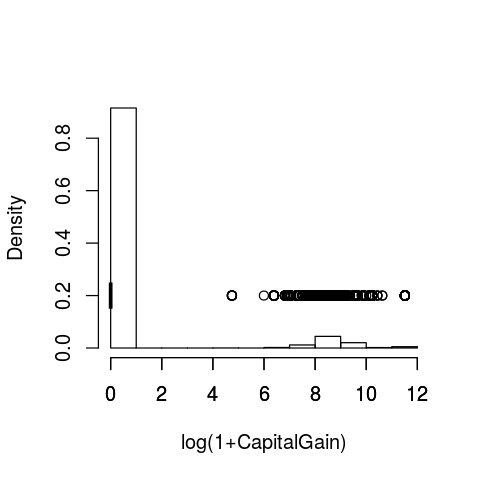

In [2]:
# dimensions des graphiques
options(repr.plot.width=4, repr.plot.height=4)
hist(dataBase[,"LcapitalGain"],probability=T, main="",xlab="log(1+CapitalGain)")
boxplot(dataBase[,"LcapitalGain"], horizontal=TRUE,boxwex=.2,  outline=TRUE,  
        frame=F, col = "lightgrey", add = TRUE,at=0.2)

Nécessité de transformer certaines variables avant de contruire des modèles linéaires puis mise en évidence d'incohérences et de fortes redondances dans certaines variables.

In [3]:
table(dataBase$relationship,dataBase$sex)   

                
                 Female  Male
  Husband             1 12459
  Not-in-family    3563  4150
  Other-relative    379   493
  Own-child        1825  2343
  Unmarried        2459   747
  Wife             1405     1

In [4]:
table(dataBase$education,dataBase$educNum)  

             
                 1    2    3    4    5    6    7    8    9   10   11   12   13
  Associates     0    0    0    0    0    0    0    0    0    0 1307 1008    0
  Bachelors      0    0    0    0    0    0    0    0    0    0    0    0 5043
  Doctorate      0    0    0    0    0    0    0    0    0    0    0    0    0
  Dropout       45  151  287  554  432  714  894  344    0    0    0    0    0
  HS-grad        0    0    0    0    0    0    0    0 9829    0    0    0    0
  HS-Graduate    0    0    0    0    0    0    0    0    0 6674    0    0    0
  Masters        0    0    0    0    0    0    0    0    0    0    0    0    0
  Prof-School    0    0    0    0    0    0    0    0    0    0    0    0    0
             
                14   15   16
  Associates     0    0    0
  Bachelors      0    0    0
  Doctorate      0    0  375
  Dropout        0    0    0
  HS-grad        0    0    0
  HS-Graduate    0    0    0
  Masters     1626    0    0
  Prof-School    0  542    0

In [5]:
table(dataBase$mariStat,dataBase$relationship)

               
                Husband Not-in-family Other-relative Own-child Unmarried  Wife
  Married         12460            14            118        83         0  1406
  Never-Married       0          4435            532      3632       795     0
  Not-Married         0          2832            182       441      2068     0
  Widowed             0           432             40        12       343     0

In [6]:
table(dataBase$origEthn,dataBase$nativCountry)

             
              British-Commonwealth China Euro_1 Euro_2 Latin-America Other
  Amer-Indian                    0     1      1      2             9     0
  Asian                         88   122      2     71             6    43
  Black                          9     0      7      0           163     6
  Other                          6     0      1      0            84     5
  White                        221     6    213    145           779   139
             
              SE-Asia South-America United-States
  Amer-Indian       1             1           267
  Asian           290             0           272
  Black             1             1          2603
  Other             0            20           111
  White            12           188         23929

Quelques mosaicplots importants montrant le liens des variables sensibles avec la cible (seuil de revenu).

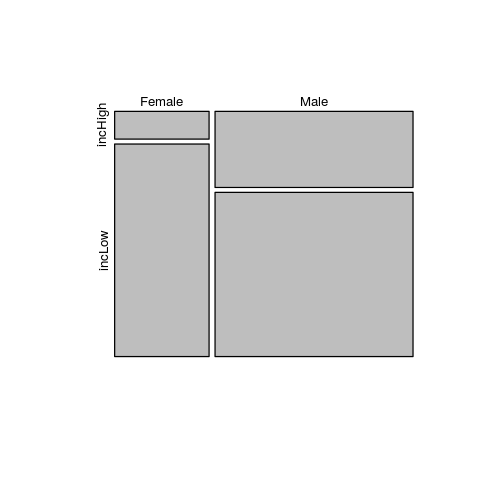

In [7]:
mosaicplot(table(dataBase[,"sex"],dataBase[,"income"]),main="")

**Q** Commentaire sur le biais présent dans la base.

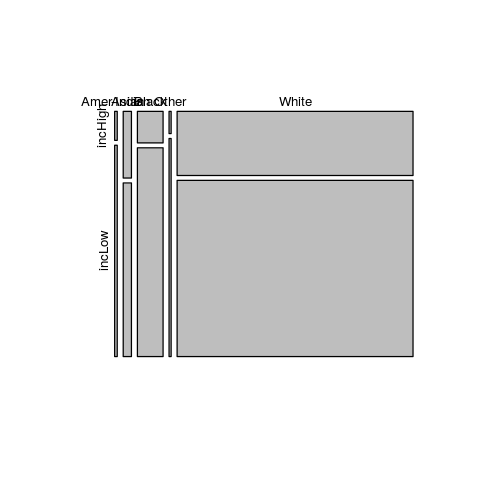

In [8]:
mosaicplot(table(dataBase[,"origEthn"],dataBase[,"income"]),main="")

Quelques modifications sont apportées de la base. Certaines variables en versions quantitatives et qualitatives comme le nombre d'heures par semaine, l'âge ou le niveau d'éducation sont conservées. Des variables sont supprimées afin de ne garder qu'une seule présence d'une information sensible: genre et origine ethnique.
- Suppression de la variable 3 `fnlwgt` qui n'a guère de signification.
- Création d'une variable binaire `Child`: présence ou non d'enfants
- Suppression de la variable 8 `relationship` redondante avec le genre et le statut marital,
- Suppression de la variable 14 `nativCountry` redondante avec l'origine ethnique.
- La variable 9 `originEthn` est simplifiée à 2 classes: CaucYes *vs.* CaucNo

In [9]:
dataBase[,"Child"]=as.factor(ifelse(dataBase$relationship=='Own-child',"ChildYes","ChildNo"))
dataBase[,"origEthn"]=as.factor(ifelse(dataBase$origEthn %in% c('Amer-Indian','Asian','Black','Other'),"CaucNo","CaucYes"))

datBas=dataBase[,-c(3,8,14)]

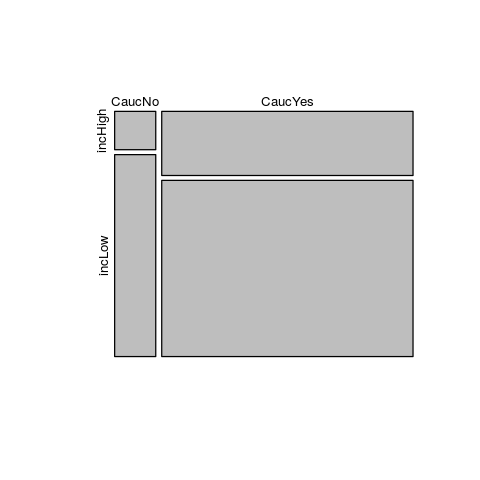

In [10]:
mosaicplot(table(dataBase[,"origEthn"],dataBase[,"income"]),main="")

**Q** Commentaire sur le biais présent dans la base.

Pour la suite, il est important que les niveaux des facteurs soient ordonnés de façon cohérente pour la bonne interprétation des tables de contingence et de leurs effectifs. Par convention, les modalités pré-jugées socialement "dévavorables": revenu faible, femme, non caucasien, précèdent les autres: revenu élevé, homme, caucasien. Il faut donc réordonner les niveaux de la variable `income` car l'ordre alphabetique ne correspond pas.

In [11]:
datBas[,"income"] <- ordered(datBas[,"income"], levels = c("incLow","incHigh"))
summary(datBas)

      age                workClass           education       educNum     
 Min.   :18.00   Federal-Govt :  933   HS-grad    :9829   Min.   : 1.00  
 1st Qu.:28.00   Not-Working  :   14   HS-Graduate:6674   1st Qu.: 9.00  
 Median :37.00   Other-Govt   : 3330   Bachelors  :5043   Median :10.00  
 Mean   :38.68   Private      :21988   Dropout    :3421   Mean   :10.16  
 3rd Qu.:47.00   Self-Employed: 3560   Associates :2315   3rd Qu.:13.00  
 Max.   :90.00                         Masters    :1626   Max.   :16.00  
                                       (Other)    : 917                  
          mariStat              occup         origEthn         sex       
 Married      :14081   Admin       :3698   CaucNo : 4193   Female: 9632  
 Never-Married: 9394   Blue-Collar :9840   CaucYes:25632   Male  :20193  
 Not-Married  : 5523   Other-occups:1552                                 
 Widowed      :  827   Professional:4028                                 
                       Sales       :34

### 2.3  [Analyse factorielle multiple des correspondances](http://wikistat.fr/pdf/st-m-explo-afcm.pdf)
Cette méthode permet d'avoir une vue d'ensemble de la structure des liaisons entre les variables qualitatives prises 2 à 2. 

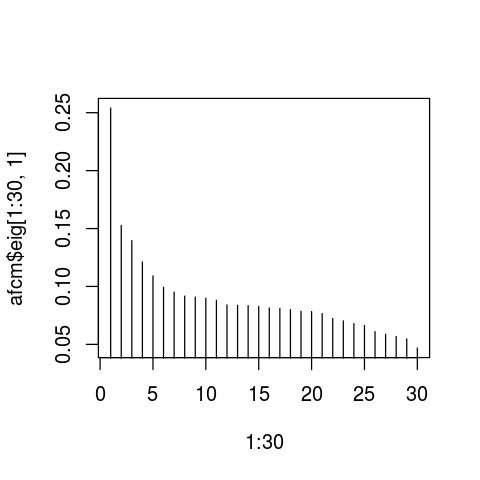

In [12]:
library(FactoMineR)
dataq=datBas[,c(2,3,5:10,12,15:17)]
afcm=MCA(dataq,graph=FALSE)
plot(1:30,afcm$eig[1:30,1],type="h")

Il pourrait être utile de considérer 3 ou 4 axes mais seuls deux sont utilisés dans cette approche élémentaire.

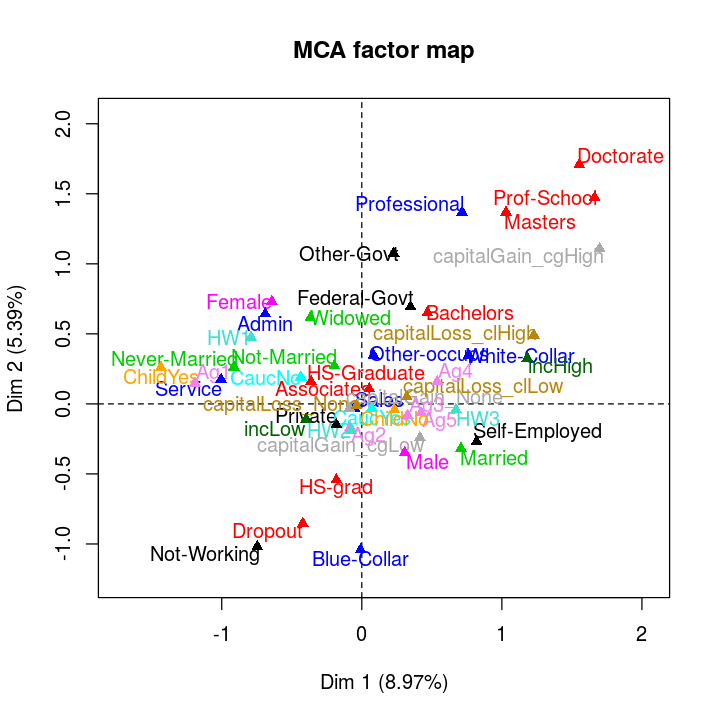

In [13]:
options(repr.plot.width=6, repr.plot.height=6)
plot.MCA(afcm,invisible=c("ind"),habillage="quali")

Remarquer la très forte et attendue liaison entre niveau d'éducation et activité selon un axe de dispersion suivant la première bissectrice lui même en relation avec les modalités haut et bas revenus alors que le genre, en première approximation, semble orthogonal à cet axe mais en relation avec le type d'activité et le nombre d'heures de travail par semaine.

Ce graphique laisse penser que le lien entre genre et niveau de revenu ne serait pas dû à une sous qualification des femmes mais à une moindre activité (travail partiel) ou à des types d'emplois moins rémunérés.

Cette représentation est complétée en projetant les individus colorés selon la variable revenu. De façon triviale, les hauts revenus se concentrent du côté des niveaux d'éducation les plus élevés.

*En résumé*: un lien direct entre revenu et niveau d'éducation, pas nécessairement de lien entre genre et niveau d'éducation mais un "frein" au revenu lié au type de travail ou d'occupation : administratif, service... et à de possibles temps partiels.

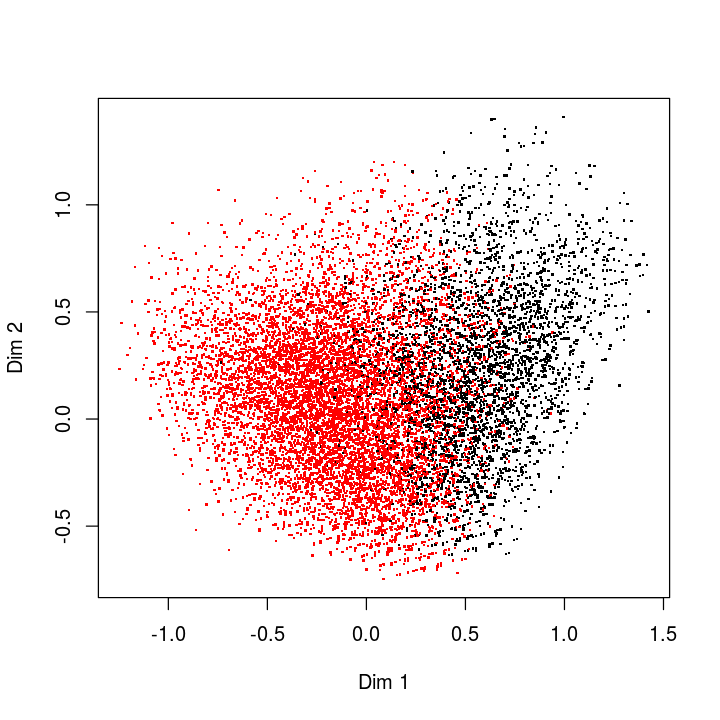

In [14]:
plot(afcm$ind$coord,type="p",pch=".",cex=2,col=as.integer(dataBase$income))

## 3 Modèles de prévision du seuil de revenu
Une comparaison détaillée de la plupart des modèles et algorithmes de prévision du seuil de revenu en fonction des différentes variables met en évidence des résultats un peu meilleurs obtenus par l'algorithme de *gradient boosting*. Néanmoins, on peut se limiter ici à un modèle de régression logisitique très compétitif et interprétable. Un arbe de décision seul donne également une précision similaire mais beaucoup trop complexe (profondeur) pour être interprétable. 

### 3.1 Echantillons
Les données sont préalablement séparées en deux échantillons apprentissage et test.

In [15]:
set.seed(111) # initialisation du générateur
# Extraction des échantillons
test.ratio=.2   # part de l'échantillon test
npop=nrow(datBas) # nombre de lignes dans les données
nvar=ncol(datBas) # nombre de colonnes
# taille de l'échantillon test
ntest=ceiling(npop*test.ratio) 
# indices de l'échantillon test
testi=sample(1:npop,ntest)
# indices de l'échantillon d'apprentissage
appri=setdiff(1:npop,testi) 

In [16]:
# construction de l'échantillon d'apprentissage
datApp=datBas[appri,]
# construction de l'échantillon test 
daTest=datBas[testi,]

### 3.2 Prévision par régression logistique
Comme la plupart des coefficients sont significatifs au sens d'un test de Fisher et par souci de simplicité, il n'est pas fait de sélection de modèle ni non plus tenté un modèle avec des interactions. 

La fonction ci-dessous calcule le taux d'erreur usuel de la matrice de confusion. Avec le réordonnencement des modalités, les bien classés sont les termes diagonaux de la matrice de confusion.

In [17]:
tauxErr=function(table){round((table[1,2]+table[2,1])/sum(table)*100,2)}

In [18]:
# estimation du modèle complet
log.lm=glm(income~.,data=datApp,family=binomial)
# significativité des paramètres
anova(log.lm,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,23859,26987.35,NA
age,1,1323.40204,23858,25663.94,9.282513e-290
workClass,4,143.06839,23854,25520.88,6.217805e-30
education,7,2816.95193,23847,22703.92,0.000000e+00
educNum,1,25.85281,23846,22678.07,3.684672e-07
mariStat,3,4102.51916,23843,18575.55,0.000000e+00
occup,6,559.42350,23837,18016.13,1.312883e-117
origEthn,1,14.79769,23836,18001.33,1.196820e-04
sex,1,40.87427,23835,17960.46,1.623445e-10
capitalGain,2,1478.23645,23833,16482.22,1.012835e-321


In [19]:
# Prévision
pred.log=predict(log.lm,newdata=daTest,type="response")
# Matrice de confusion pour la prévision du 
# dépassement de seuil
confMat=table(pred.log>0.5,daTest$income)
confMat

       
        incLow incHigh
  FALSE   4159     551
  TRUE     334     921

In [20]:
tauxErr(confMat)

[1] 14.84

Les résultats sont très similaires à ceux obtenus par d'autres algorithmes comme les forêts aléatoires.

### 3.3 Modèle de régression sans la variable genre

In [21]:
# estimation du modèle complet
log_g.lm=glm(income~.,data=datApp[,-8],family=binomial)
# significativité des paramètres
anova(log_g.lm,test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,23859,26987.35,NA
age,1,1323.40204,23858,25663.94,9.282513e-290
workClass,4,143.06839,23854,25520.88,6.217805e-30
education,7,2816.95193,23847,22703.92,0.000000e+00
educNum,1,25.85281,23846,22678.07,3.684672e-07
mariStat,3,4102.51916,23843,18575.55,0.000000e+00
occup,6,559.42350,23837,18016.13,1.312883e-117
origEthn,1,14.79769,23836,18001.33,1.196820e-04
capitalGain,2,1489.47218,23834,16511.86,4.940656e-324
capitalLoss,2,232.37219,23832,16279.49,3.475519e-51


In [22]:
# Prévision
pred_g.log=predict(log_g.lm,newdata=daTest[,-8],type="response")
# Matrice de confusion pour la prévision du 
# dépassement de seuil
confMat=table(pred_g.log>0.5,daTest$income)
confMat

       
        incLow incHigh
  FALSE   4163     551
  TRUE     330     921

In [23]:
tauxErr(confMat)

[1] 14.77

La qualité de prévision est sensiblement la même.
### 3.4 Régression logistique sans l'origine

In [24]:
# estimation du modèle complet
log_o.lm=glm(income~.,data=datApp[,-7],family=binomial)
# Prévision
pred_o.log=predict(log_o.lm,newdata=daTest[,-7],type="response")
# Matrice de confusion pour la prévision du 
# dépassement de seuil
confMat=table(pred_o.log>0.5,daTest$income)
confMat; tauxErr(confMat)

       
        incLow incHigh
  FALSE   4161     553
  TRUE     332     919

[1] 14.84

Même remarque.

## 4 Estimation de l'effet disproportionné
Les mesures de discrimination indirecte ou de groupe sont basées sur un critère d'effet disproportionné ou *disparate impact* (*DI*) apparu aux USA en 1971 pour détecter des situations discriminatoires à l'embauche. Ce critère est défini par le rapport de deux probabilités. La probabilité de bénéficier d'une situation ou décision favorable (revenu élevé, crédit, emploi...) pour une personne du groupe protégé par la loi: femme ou origine non caucasienne, sur la même probabilité pour une personne de l'autre groupe: homme ou origine caucasienne.

*Notations*: 

- $Y$ est la variable cible ou à expliquer, ici le revenu, $Y=1$ revenu élevé *vs* $Y=0$; 
- $g(X)=\hat{Y}$ le score élevé ou faible ou prévision du revenu, $g(X)=\hat{Y}=0$: prévision d'un revenu faible;
- $S$ est la variable sensible qui désigne le groupe en principe protégé par la loi contre une possible discrimination. Il s'agit ici du genre ou de l'origine ethnique réduite à 2 modalités: caucasien ($S=1$) ou non caucasien ($S=0$). 

$$DI=\frac{P(Y=1|S=0)}{P(Y=1|S=1)}.$$

Cette quantité est estimée à partir des valeurs de la table de contingence croisant les variables $Y$ et $S$.

### 4.1 Fonction *disparate*
Une fonction R calcule le $DI$ et fournit de plus une estimation par intervalle de confiance (Besse et al. 2018) décomposant la fonction de densité de la statistique de test par la *delta method*. Cette fonction a quatre arguments:   
- une matrice $X$ de valeurs binaires $(0,1)$;
- l'indice de la variable $S$  de $X$ considérée comme sensible; 
- l'indice de la variable cible $Y$;
- le risque de l'intervalle de confiance, par défaut 5%.

Elle renvoie les trois estimations $DI$ et $IC_g$, $IC_d$ bornes de l'intervalle de confiance.

Cette fonction estime aussi le *BER* (*Balanced Error Rate*):
$$BER=\frac{P(\hat{Y}=0|S=1)+P(\hat{Y}=1|S=0)}{2}.$$

In [25]:
source("disparate.R")

### 4.2 Effet disproportionné de la base d'apprentissage
Calculé sur les données initiales, le *disparate impact* met en évidence un biais social fort. Les variables sensibles sont le genre puis l'origine ethnique. La fonction `disparate` nécessite de mettre en forme les variables utilisées; "1" code la modalité plus "favorable": homme, caucasien, revenu élevé.

In [26]:
# Variable genre rendue entière: 0, 1
s1= as.integer(datBas[,8])-1
# variable origine ethnique rendue entière 0, 1
s2= as.integer(datBas[,7])-1
# Variable cible ou décision (seuil de revenu) également entière: 0, 1
Y=as.integer(datBas$income)-1
coded_data=data.frame(s1,s2,Y)

#### Ségrégation vis à vis du genre

Le $DI$ est simplement estimé à partir de la table de contingence par le rapport:
$\frac{n_{21}}{(n_{11}+n_{21})}/\frac{n_{22}}{(n_{12}+n_{22})}$ tandis que le risque de cette estimation est contrôlé par un intervalle de confiance à 95% par défaut.

In [27]:
round(disparate(coded_data,1,3),3)[1:3]

[1] 0.343 0.365 0.386

L'estimation du *DI* est instable mais l'estimation sur des échantillons bootstrap restent dans la zone de risque contrôlée par l'intervalle de confiance. 

In [28]:
B=1000
set.seed(11)
n=nrow(coded_data)
res=matrix(0,B,3)
for (i in 1:B)
    {
    boot=sample(n,n,replace=T)
    res[i,]=disparate(coded_data[boot,],1,3)[1:3]
    }

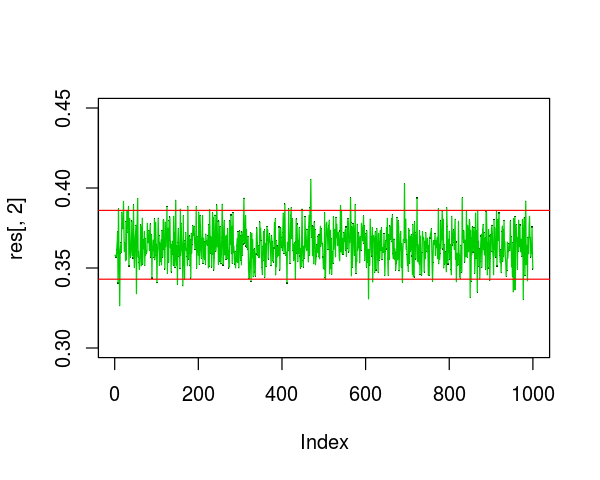

In [29]:
options(repr.plot.width=5, repr.plot.height=4)
plot(res[,2],ylim=c(0.3,0.45),pch='.')
lines(res[,2],col=3,pch='.')
abline(h=0.343,col=2)
abline(h=0.386,col=2)

Estimation bootstrap de l'intervalle de confiance.

In [30]:
library(boot)
fc <- function(d, i){ 
    d2 <- d[i,]
    return(statistic=disparate(d2,1,3)[2])
}
set.seed(11)
bootDI <- boot(coded_data,fc, R=1000)
bootDI


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = coded_data, statistic = fc, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.3645429 -2.375429e-05  0.01082264

In [31]:
boot.ci(boot.out = bootDI, type = "perc")

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = bootDI, type = "perc")

Intervals : 
Level     Percentile     
95%   ( 0.3440,  0.3864 )  
Calculations and Intervals on Original Scale

Comme supposé, l'intervalle de confiance issu de l'approximation par *delta method*: $[0.343, 0.386]$ se confond avec  celui obtenu par estimation bootstrap: $[0.344, 0.386]$.

#### Ségrégation vis à vis de l'origine: caucasienne *vs.* autre. 

In [32]:
round(disparate(coded_data,2,3),3)[1:3]

[1] 0.555 0.598 0.641

Discrimination nettement plus importante selon le genre que selon l'origine ethnique.

### 4.3 Effet disproportionné des prévisions par régression logistique
Le même ratio ou impact disproportionné calculé sur les prévisions $g(X)$ de $Y$ plutôt que sur $Y$ mesure explicitement l'effet de la prévision. Il revient à évaluer l'égalité des taux de prévision favorable. 

La valeur seuil de la probabilité de dépassement du seuil de revenu est fixée par défaut à 0.5.

In [33]:
Yhat=as.numeric(pred.log>0.5)
coded_data1=data.frame(s1[testi],s2[testi],Yhat,as.integer(daTest$income)-1)

#### Avec régression logistique et par genre
La prévision reproduit et même renforce significativement le biais social pour le genre.

In [34]:
round(disparate(coded_data1,1,3),3)[1:3]

[1] 0.212 0.255 0.298

#### Avec régression logistique et par origine
Le renforcement du biais selon l'origine n'est pas statistiquement significatif.

In [35]:
round(disparate(coded_data1,2,3),3)[1:3]

[1] 0.416 0.511 0.607

### 4.4 Effet disproportionné des prévisions sans la variable sensible
Le genre ou l'origine ethnique impacte le type d'activité et en conséquence le revenu. Aussi, supprimer la variable sensible du modèle ne suffit évidemment pas à réduire le biais discirminatoire.
#### Avec la régression et par genre

In [36]:
Yhat=as.numeric(pred_g.log>0.5)
coded_data=data.frame(s1[testi],s2[testi],Yhat)
round(disparate(coded_data,1,3),3)[1:3]

[1] 0.226 0.270 0.315

#### Avec la régression et par origine

In [37]:
Yhat=as.numeric(pred_o.log>0.5)
coded_data=data.frame(s1[testi],s2[testi],Yhat)
round(disparate(coded_data,2,3),3)[1:3]

[1] 0.461 0.561 0.662

La réduction du *disparate impact* obtenue en supprimant la variable sensible n'est pas statistiquement significative de même que les erreurs de prévisions restent stables. Le déterminisme social est plus fort que la présence de la variable sensible: *une femme ou une personne non caucasienne travaille moins ou de façon moins qualifiée quelque soit son niveau d'éducation*. 

## 5 Effet sur les erreurs
L'effet disproportionné est une première source de biais ou de discrimination parmi bien d'autres. Une deuxième souvent évoquée concerne les erreurs de prévision ou leurs précisions; c'est l'*overall accuracy equality*.
### 5.1 taux d'erreur selon la variable sensible

In [38]:
apply(table(pred.log<0.5,daTest$income,daTest$sex),3,tauxErr)

Female   Male 
 92.48  81.56

In [39]:
apply(table(pred.log<0.5,daTest$income,daTest$origEthn),3,tauxErr)

CaucNo CaucYes 
  89.82   84.33

Selon l'origine et surtout pour le genre, les taux d'erreur de prévision et donc les précisions sont très différentes mais au détriment du groupe "majoritaire", incluant sans doute beaucoup plus de disparité et donc de difficultés à être prédit.

## 5.2 Asymétrie de la matrice de confusion
Une autre source de discrimination, mise en évidence par le site [Propublica](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing) à propos du score de récidive,  concerne une inversion de l'asymétrie de la matrice de confusion selon la variable sensible; comparer les nombre de faux positifs ou faux négatifs selon le genre ou l'origine.

De très nombreux critères ont été proposés pour évaluer l'asymétrie et dont [Verma et Rubin 2018](http://fairware.cs.umass.edu/papers/Verma.pdf)) proposent une synthèse. Leur définitions, sont basées sur les différentes fréquences issues de la table de contingence et calculées par la fonction ci-dessous.

In [40]:
contRatio <- function(T){ 
    # Ratios calculés à partir de la matrice de confusion
    TP=T[2,2] # true positive
    FP=T[1,2] # false positive
    FN=T[2,1] # false negative
    TN=T[1,1]  # true negative
    PPV=TP/(TP+FP) # P(Y=1|g(x)=1) positive predictive value
    FDR=FP/(TP+FP) # P(Y=0|g(x)=1) false discovery rate 
    FOR=FN/(TN+FN) # P(Y=1|g(x)=0) false omission rate
    NPV=TN/(TN+FN) # P(Y=0|g(x)=0) negative predictive value
    TPR=TP/(TP+FN) # P(g(x)=1|Y=1) true positive rate
    FPR=FP/(FP+TN) # P(g(x)=1|Y=0) false positive rate
    FNR=FN/(TP+FN) # P(g(x)=0|Y=1) false negative rate
    TNR=TN/(FP+TN) # P(g(x)=0|Y=0) true negative rate
    return(list("PPV"=PPV,"FDR"=FDR,"FOR"=FOR,"NPV"=NPV,"TPR"=TPR,"FPR"=FPR,"FNR"=FNR,"TNR"=TNR))
}

In [41]:
contRatio(table(pred.log>0.5,daTest$income))

$PPV
[1] 0.6256793

$FDR
[1] 0.3743207

$FOR
[1] 0.07433786

$NPV
[1] 0.9256621

$TPR
[1] 0.7338645

$FPR
[1] 0.1169851

$FNR
[1] 0.2661355

$TNR
[1] 0.8830149

Liste de critères de loyauté pouvant être définis à partir des fréquences précédentes conditionnellement à la variable sensible. Selon les auteurs, il y a loyauté de traitement si:
- *Predictive parity*: les deux groupes ont les mêmes *PPV*s et par conséquence les mêmes *FDR*s;
- *False positive error rate balance* ou *predictive equality*: mêmes *FPR*s et par conséquence les mêmes *TNR*s;
- *False negative error rate balance* ou *equal opportunity*: mêmes *FNR*s et par conséquence les mêmes *TPR*s;
- *Conditional procedure accuracy equality* ou *disparate mistreatment* combine les deux ci-dessus: mêmes *TPR*s **ET** mêmes *FPR*s;
- *Conditionnal use accuracy equality*: mêmes *PPV*s **ET** mêmes *NPV*s;
- *Teatment equality*: les rapports *FN/FP* sont les mêmes pour les deux groupes.

D'autres critères ont été proposés (cf. Verma et Rubin; 2018), il ne sont pas développés ici.

#### Par genre
La matrice de confusion est obtenue conditionnellement aux groupes pour comparer les différents indicateurs de loyauté.

In [42]:
fairness=data.frame("Female"=as.matrix(contRatio(table(pred.log>0.5,daTest$income,daTest$sex)[,,1])),
                    "Male"=as.matrix(contRatio(table(pred.log>0.5,daTest$income,daTest$sex)[,,2])))
fairness

,Female,Male
PPV,0.4827586,0.6524194
FDR,0.5172414,0.3475806
FOR,0.01612903,0.1109902
NPV,0.983871,0.8890098
TPR,0.8,0.7255605
FPR,0.06564551,0.1495489
FNR,0.2,0.2744395
TNR,0.9343545,0.8504511


Il n'est pas simple de comparer toutes ces quantités. Il apparaît néanmoins que les taux de faux positifs (*Conditional procedure accuracy equality*) sont nettement en faveur des hommes. Il y a certes plus d'erreurs à leur encontre mais c'est à leur avantage. 

#### Par origine

In [43]:
fairness2=data.frame("CaucNo"=as.matrix(contRatio(table(pred.log>0.5,daTest$income,daTest$origEthn)[,,1])),
                    "CaucYes"=as.matrix(contRatio(table(pred.log>0.5,daTest$income,daTest$origEthn)[,,2])))
fairness2

,CaucNo,CaucYes
PPV,0.5448276,0.6345139
FDR,0.4551724,0.3654861
FOR,0.0342556,0.08248527
NPV,0.9657444,0.9175147
TPR,0.752381,0.7321739
FPR,0.08260325,0.1240092
FNR,0.247619,0.2678261
TNR,0.9173967,0.8759908


Même remarque mais à un degré moindre.

Le critère en question: comparaison des taux de faux positifs peut être précisé en estimant leur rapport par un intervalle de confiance. C'est l'objet de la fonction `OverallAccuracyEquality` qui admet 5 paramètres:
- X: martrice X de caleurs binaires
- S: index de la variable du groupe protégé
- Y: index de la variable cible
- P: index de la prévision $\hat{Y}$

In [44]:
source('OverallAccuracyEquality.R')

In [45]:
summary(coded_data1)

   s1.testi.        s2.testi.           Yhat       
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:1.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.0000  
 Mean   :0.6701   Mean   :0.8484   Mean   :0.2104  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
 as.integer.daTest.income....1
 Min.   :0.0000               
 1st Qu.:0.0000               
 Median :0.0000               
 Mean   :0.2468               
 3rd Qu.:0.0000               
 Max.   :1.0000               

In [46]:
OAE(coded_data1,1,3,4)

,inf,est_value,sup
TP,1.002978,1.102596,1.202214
TN,1.077184,1.098658,1.120131


In [47]:
0.752381/0.7321739; 0.9173967/0.8759908

[1] 1.027599

[1] 1.047268

In [48]:
source('ConditionalUseEquality.R')

In [49]:
CUAE(coded_data1,1,3,4)

,inf,est_value,sup
Y=0/f(X)=1,1.27109286,1.4881190,1.705145
Y=1/f(X)=0,0.08976584,0.1453194,0.200873


## 6  *Testing* et détection de discrimination individuelle
### 6.1 Introduction

#### [Historique](https://fr.wikipedia.org/wiki/Test_de_discrimination)
Depuis 1939 en France pour les boîtes de nuit.

#### [Validité juridique](https://www.juritravail.com/discrimination-physique/embauche/ph-alternative-A-1.html) 
Le *testing* accepté comme preuve de discrimiantion depuis 2016.

#### Approches sociologiques 
Le test de discrimination ou *testing* automatique est pratiquée en France de façon systématique pour des études sociologiques par l'[Observatoire des discriminations](http://www.observatoiredesdiscriminations.fr/testing), le laboratoire TEPP: [L'Horty et al. (2017)](http://www.tepp.eu/doc/users/268/bib/banque-et-assurance_9025.pdf), ou pilotée par la [DARES](http://dares.travail-emploi.gouv.fr/dares-etudes-et-statistiques/etudes-et-syntheses/dares-analyses-dares-indicateurs-dares-resultats/testing) du ministère du travail en lien avec l'association [ISM Corum](http://www.ismcorum.org/).... Certains entreprises demandent d'ailleurs à ISM Corum de [tester leur mode de recrutement](http://www.ismcorum.org/le-testing-d-entreprise-%E2%80%93-temoignages-d-adecco-casino-lvmh-michael-page-M22-R22-A443.html). Il serait sans doute intéressant de disposer des données brutes sur l'enquête citée mais seules les [tableaux agrégés](http://dares.travail-emploi.gouv.fr/IMG/xls/donnees_a_telecharger-_dares_analyses_no076.xls) sont accessibles. 

*Remarques*: des groupes à contacter?
- l'observatoire des discriminations propose un [audit qualité](http://www.observatoiredesdiscriminations.fr/diagnostics-qualite) des procédures de recrutement. 
- [Novethic](https://www.novethic.fr/lexique/detail/testing.html), filliale de la caisse des dépôts et consignation, donnent des formations pour des entreprises "éthiques".

#### *Testing* et estimation du biais
Dans un autre ordre d'idée, [Galhotra et al. (2017)](https://arxiv.org/abs/1709.03221) définissent le biais d'une décision en incluant une notion de causalité. Le logiciel afférent ([Themis](https://github.com/LASER-UMASS/Themis)) opère un *testing* de logiciels ou décisions automatiques dans le but d'évaluer les proportions d'individus virtuels discriminés permettant d'estimer ce critère de biais. Les individus virtuels sont générés par permutation aléatoire des valeurs prises pour les modalités des variables explicatives nécessairement qualitatives ou découpées en classe.

#### *Testing* rudimentaire
Analysons la robustesse des deux modèles à une opération de *testing* rudimentaire: un nouvel échantillon test est construit en *échangeant les deux modalités de la variables sensible*. La variable cible (seuil de revenu) est ensuite reprédite par le modèle initial donné. 

*Question*: Des prévisions sont elles modifiées et pour quels individus?

**Existe-t-il des personnes pour lesquelles le seul changement de genre ou d'origine a pour effet de changer la prévision du seuil de revenu `income`?**

C'est en effet parmi ces personnes de l'échantillon test que se trouvent celles discriminées par la décision apprise et donc susceptibles d'une action en justice lorsque la décision algorihtmique (*e.g.* accès au crédit, à l'assurance, à l'emploi...) impacte cette personne. Cette discrimination individuelle peut en effet peut en effet être mise en évidence contrairement à la discrimination vis à vis d'un groupe dont il n'existe pas de définition ou de caractérisation. 

Evidemment, comme pour l'estimation du *disparate impact*, il est nécessaire de disposer de la variable sensible (genre ou origine) pour pouvoir opérer du *testing*.


### 6.2 Personnes discriminées selon leur genre

Le comportement des deux prédicteurs est différent mais assez logiquement. Le prédicteur linéaire (logistique) est monotone vis à vis du changement de genre ou d'origine tandis qu'un modèle non linéaire (*e.g.* randomForest) produit des résultats assez erratiques ininterprétable.

#### Modification de l'échantillon et prévisions.

In [50]:
daTest2=daTest
daTest2$sex=as.factor(ifelse(daTest$sex=="Male","Female","Male"))
# Prévision du "nouvel" échantillon test
pred2.log=predict(log.lm,daTest2,type="response")

#### Dans le cas de la régression logistique
La situation est tranchée.

In [51]:
table(pred.log<0.5,pred2.log<0.5)

       
        FALSE TRUE
  FALSE  1171   84
  TRUE     10 4700

Même chose mais répartition par genre.

In [52]:
table(pred.log<0.5,pred2.log<0.5,daTest$sex)

, ,  = Female

       
        FALSE TRUE
  FALSE   140    0
  TRUE     10 1818

, ,  = Male

       
        FALSE TRUE
  FALSE  1031   84
  TRUE      0 2882


**N.B.** Il n'y a cette fois plus que 94 personnes dont la prévision de revenu change lorsqu'elles changent de genre. Et le changement est dans le sens attendu.
- 10 femmes qui passent d'une prévision de revenu faible à une prévision de revenu élevé
- 84 hommes qui prennnent le chemin inverse (discrimination initiale positive) lorsqu'ils deviennent des femmes.

In [53]:
which(pred.log>0.5&pred2.log<0.5&daTest$sex=="Female")  # 10 femmes dans ce cas

named integer(0)

In [54]:
which(pred.log>0.5&pred2.log<0.5&daTest$sex=="Male") # 0 homme dans ce cas

4016 11476 26318 25698 30784 14929 11620  8768  2498 26468 18592 13640 16079 
  203   322   327   494   565   680   683   776   803   814   951   992  1006 
 5522 25716 23965 31653 21271 10264 17657 18286 29255 21565 15083  7768 20371 
 1013  1195  1216  1241  1384  1401  1491  1499  1507  1576  1624  1626  1733 
 9717 28092  7894  7652  9137 10579 27573  1072 25750  7593 21066  4864 21711 
 1756  1959  1965  2044  2092  2117  2132  2137  2218  2269  2406  2428  2432 
 1997 27593    40 12690 16907 22389  6448  2390  6321  4904 16932 26892  9269 
 2465  2468  2705  2715  2776  2868  2901  2969  3058  3075  3367  3476  3499 
 1987 14031  8217 27291  5265 17246 14883 14127  4534 30821  9270   358 31707 
 3535  3678  3901  3923  4070  4074  4095  4216  4252  4282  4286  4354  4416 
 1928 11388   410 31105 26430 23933 12932 11613  8784 15699 14682 15621 15995 
 4496  4569  4751  4799  4846  4900  5036  5283  5399  5464  5522  5597  5645 
17937 17502 26043  9090 19137 20714 
 5742  5747  5783  5796  5814  5816

### 6.3 Personnes discriminées selon leur origine
Mêmes calculs vis-à-vis de la variable sensible origine.
#### Modification de l'échantillon et prévisions

In [55]:
daTest3=daTest
daTest3$origEthn=as.factor(ifelse(daTest$origEthn=="CaucYes","CaucNo","CaucYes"))
# Prévision du "nouvel" échantillon test
pred3.log=predict(log.lm,newdata=daTest3,type="response")

#### Dans le cas de la régression logisitique
Comme pour la discrimination selon le genre, la détection de personnes discriminées selon leur origine est nette. Les prévisions de seuil de revenu de 160 personnes sont affectées par le changement d'origine.
- 12 sont discriminées par leur origine
- 148 bénéficient d'une discrimination positive

In [56]:
table(pred.log<0.5,pred3.log<0.5)

       
        FALSE TRUE
  FALSE  1107  148
  TRUE     12 4698

In [57]:
table(pred.log<0.5,pred3.log<0.5,daTest$origEthn)

, ,  = CaucNo

       
        FALSE TRUE
  FALSE   105    0
  TRUE     12  787

, ,  = CaucYes

       
        FALSE TRUE
  FALSE  1002  148
  TRUE      0 3911


In [58]:
table(pred.log<0.5,pred2.log<0.5,daTest$sex,daTest$income)

, ,  = Female,  = incLow

       
        FALSE TRUE
  FALSE    28    0
  TRUE      5 1703

, ,  = Male,  = incLow

       
        FALSE TRUE
  FALSE   265   41
  TRUE      0 2451

, ,  = Female,  = incHigh

       
        FALSE TRUE
  FALSE   112    0
  TRUE      5  115

, ,  = Male,  = incHigh

       
        FALSE TRUE
  FALSE   766   43
  TRUE      0  431


Réponse: de façon homogène. M

#### Variable sensible origine

In [59]:
table(pred.log<0.5,pred2.log<0.5,daTest$origEthn,daTest$income)

, ,  = CaucNo,  = incLow

       
        FALSE TRUE
  FALSE    25    1
  TRUE      1  732

, ,  = CaucYes,  = incLow

       
        FALSE TRUE
  FALSE   268   40
  TRUE      4 3422

, ,  = CaucNo,  = incHigh

       
        FALSE TRUE
  FALSE    76    3
  TRUE      0   66

, ,  = CaucYes,  = incHigh

       
        FALSE TRUE
  FALSE   802   40
  TRUE      5  480


#### *Testing* et prévision "loyale" 
Pour la régession logistique, fixer comme probablité prédite le maximum des deux probablités obtenues en échangeant les modalités de la variable sensible. De façon générale, quelques soit le prédicteur, choisir la situation la plus favorable pour la personne, quelque soit le genre (resp. l'origine) observé. La discimination individuelle repérable par *testing* est neutralisée et l'influence sur le taux d'erreur quasi négligeable; n'induire éventuellement que de la *discrimination positive* pour le groupe sensible si cela améliore le taux d'erreur global. 

*Régression logistique et genre*

In [60]:
predict.fairRegLog=ifelse(pred.log<pred2.log,pred.log,pred2.log)
confMat=table(predict.fairRegLog<0.5,daTest$income)
confMat;(confMat[1,1]+confMat[2,2])/sum(confMat)

       
        incLow incHigh
  FALSE    293     878
  TRUE    4200     594

[1] 0.1487008

*Régression logistique et origine*

In [61]:
predict.fairRegLog=ifelse(pred.log<pred3.log,pred.log,pred3.log)
confMat=table(predict.fairRegLog<0.5,daTest$income)
confMat;(confMat[1,1]+confMat[2,2])/sum(confMat)

       
        incLow incHigh
  FALSE    261     846
  TRUE    4232     626

[1] 0.1487008

Pour la régression logistique, la correction qui rend la décision localement loyale c'est-à-dire en supprimant tout discrimination individuelle n'a qu'un impact très marginal sur l'erreur de prévision. Cette "correction" du biais permet d'échapper à une poursuite juridique individuelle mais ne corrige pas le biais, source importante de discrimination.

Qu'en est-il de la correction de l'effet disproportionné?

## Conclusion
En résumé, 

Ces dernières questions abordent celle de correction du biais et donc l'objectif d'éviter une discrimination ou tout du moins, a *minima*, que le modèle ou l'algorithme évite une sur-discrimination tout à fait déloyale. Ce sera l'objectif du tutoriel suivant.

## Références
Besse P. ,del Barrio E., Gordaliza P., Loubes J.-M. (2018-a). Confidence Intervals for testing Disparate Impact in Fair Learning, [arXiv](https://arxiv.org/abs/1807.06362).